This task requires you to implement Principal Component Analysis and perform dimensionality reduction on a given dataset(s). The list of subtasks is given below.

## Data processing

In [2]:
# Installing Pillow Libraries
!pip install scikit-learn matplotlib Pillow


[notice] A new release of pip is available: 23.1.1 -> 23.2.1
[notice] To update, run: pip install --upgrade pip


In [3]:
import numpy as np
import os
from random import randrange
from matplotlib import pyplot as plt
from PIL import Image

In [4]:
cfw_dict = {
    'Amitabhbachan': 0,
    'AamirKhan': 1,
    'DwayneJohnson': 2,
    'AishwaryaRai': 3,
    'BarackObama': 4,
    'NarendraModi': 5,
    'ManmohanSingh': 6,
    'VladimirPutin': 7
}

opt = {
    'image_size': 32,
    'is_grayscale': False,
    'val_split': 0.75
}

In [5]:
def load_image(path):
    im = Image.open(path).convert('L' if opt['is_grayscale'] else 'RGB')
    im = im.resize((opt['image_size'],opt['image_size']))
    im = np.array(im)
    im = im/256
    return im

def display_images(imgs,classes,row=1,col=2,w=32,h=32):
    fig=plt.figure(figsize=(8, 8))
    for i in range(1, col*row +1):
        img = imgs[i-1]
        fig.add_subplot(row, col, i)
        
        if opt['is_grayscale']:
            plt.imshow(img , cmap='gray') 
        else:
            plt.imshow(img)
        
        plt.title("Class:{}".format(classes[i-1]))
        plt.axis('off')
    plt.show()

def load_data(dir_path):
    image_list = []
    y_list = []
    label_dict = cfw_dict
    for filename in sorted(os.listdir(dir_path)):
        if filename.endswith(".png"):
            im = load_image(os.path.join(dir_path,filename))
            y = filename.split('_')[0]
            y = label_dict[y] 
            image_list.append(im)
            y_list.append(y)
        else:
            continue
    image_list = np.array(image_list)
    y_list = np.array(y_list)
    print("Dataset shape:",image_list.shape)
    print("Label shape:",y_list.shape)

    return image_list,y_list

In [6]:
dirpath = 'CFW'
X,y = load_data(dirpath)

Dataset shape: (672, 32, 32, 3)
Label shape: (672,)


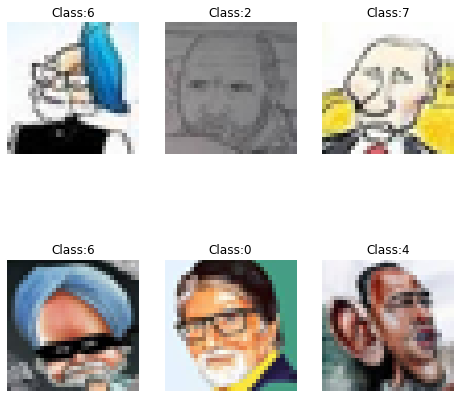

In [7]:
N,H,W = X.shape[0:3]
C = 1 if opt['is_grayscale'] else X.shape[3]

ind = np.random.randint(0,y.shape[0],6)
display_images(X[ind,...],y[ind], row=2,col=3)

1. Perform dimensionality reduction on the CFW dataset, varying the number of principle components. We have given the script to pre-process the data and to get the necessary information from the image Script.

## Data Exploration 

In [8]:
import pandas as pd

In [9]:
X[:5] # peeking into the data

array([[[[0.00390625, 0.        , 0.        ],
         [0.        , 0.00390625, 0.00390625],
         [0.        , 0.01171875, 0.015625  ],
         ...,
         [0.0234375 , 0.046875  , 0.01171875],
         [0.02734375, 0.0390625 , 0.0078125 ],
         [0.0234375 , 0.03515625, 0.0078125 ]],

        [[0.        , 0.01171875, 0.015625  ],
         [0.00390625, 0.00390625, 0.0078125 ],
         [0.0234375 , 0.0078125 , 0.01171875],
         ...,
         [0.05859375, 0.08984375, 0.02734375],
         [0.05859375, 0.08984375, 0.02734375],
         [0.0546875 , 0.0859375 , 0.0234375 ]],

        [[0.0078125 , 0.015625  , 0.0234375 ],
         [0.015625  , 0.        , 0.00390625],
         [0.09375   , 0.0234375 , 0.015625  ],
         ...,
         [0.09375   , 0.13671875, 0.046875  ],
         [0.0859375 , 0.1328125 , 0.04296875],
         [0.08203125, 0.1328125 , 0.04296875]],

        ...,

        [[0.01171875, 0.0078125 , 0.00390625],
         [0.19921875, 0.10546875, 0.06640625]

In [10]:
y[:5] # peeking into the labels

array([1, 1, 1, 1, 1])

In [11]:
X.shape,y.shape # Observing shapes

((672, 32, 32, 3), (672,))

In [12]:
X = X.reshape(672,32*32*3) # Reshaping the data into 1D input for an image

## Building PCA

In [13]:
class PCA:
    # Initializing the no_of_components
    def __init__(self,n_components):
        self.n_components = n_components
        self.explained_variance = None
        self.cum_variance = None
    # Method for fitting and transforming the data
    def fit_transform(self,x):
        # Converting the data to Mean Centered Data
        mean_centered_data = x-np.mean(x,axis=0)
        # Creating the covariance matrix
        cov_matrix = np.cov(mean_centered_data.T)
        # Calculating the eigen components of the matrix
        eig_values,eig_vectors = np.linalg.eigh(cov_matrix)
        # Getting the indexes of highest eigen values
        index = np.argsort(eig_values)[::-1]
        # Filtering the Eigen Values and Eigen Vectors
        eig_values = eig_values[index]
        eig_vectors = eig_vectors[:,index]
        # Calculating the explained variance and Cummulative Explained variance
        self.explained_variance = eig_values/np.sum(eig_values)
        self.cum_variance = np.cumsum(self.explained_variance[:self.n_components])
        # Change the basis,Transform and return the transformed data
        return np.dot(mean_centered_data,eig_vectors[:self.n_components].T)

In [14]:
# Model with ten components
model = PCA(10)
model.fit_transform(X)
model.cum_variance

array([0.33621194, 0.41963403, 0.47370082, 0.50335928, 0.53034595,
       0.55453427, 0.57287666, 0.59081871, 0.60713562, 0.61994103])

In [15]:
# Model with 20 components
model = PCA(20)
model.fit_transform(X)
model.cum_variance

array([0.33621194, 0.41963403, 0.47370082, 0.50335928, 0.53034595,
       0.55453427, 0.57287666, 0.59081871, 0.60713562, 0.61994103,
       0.63078757, 0.64102029, 0.65034278, 0.65908156, 0.66740645,
       0.67524029, 0.68295629, 0.69026849, 0.69672389, 0.70288685])

In [16]:
# Model with 30 Components
model = PCA(30)
model.fit_transform(X)
model.cum_variance

array([0.33621194, 0.41963403, 0.47370082, 0.50335928, 0.53034595,
       0.55453427, 0.57287666, 0.59081871, 0.60713562, 0.61994103,
       0.63078757, 0.64102029, 0.65034278, 0.65908156, 0.66740645,
       0.67524029, 0.68295629, 0.69026849, 0.69672389, 0.70288685,
       0.70863359, 0.7143325 , 0.71969254, 0.72490209, 0.72991124,
       0.73464004, 0.73916383, 0.74350597, 0.74771862, 0.75177574])

2. Plot the the relationship between the cumulative explained variance and the number of principal components. The x-axis of the plot typically represents the number of principal components, and the y-axis represents the cumulative explained variance.

In [17]:
# Create a model with the N components and find cummulative exp.Variance
model = PCA(3072)
model.fit_transform(X)
cum_variance = model.cum_variance

In [18]:
import matplotlib.pyplot as plt

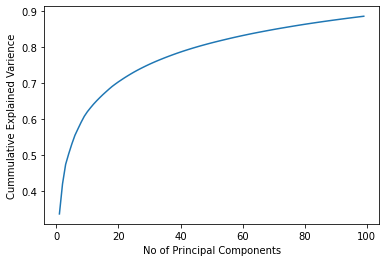

In [19]:
# Ploting the Cum.Exp.Variance vs No.principal Componants
plt.plot(range(1,100),cum_variance[:99])
plt.xlabel("No of Principal Components")
plt.ylabel("Cummulative Explained Varience")
plt.show()

* Just with the 100 principal components we could explain almost 90% of the variance in the original 3072 dimensional data

3. Perform the dimensionality reduction on features that you have used for assignment 1 (pictionary dataset) and show the metrics you have shown for the assignment1 
* Compare the results and write down the observations in the MARKDOWN.

In [20]:
#Loading the data file and removing the unwanted column
data = pd.DataFrame(np.load("data.npy",allow_pickle=True))
data.head()

,0,1,2,3,4
0,9f894201-9d0d-4f75-853b-595c0c1bd661,"[[-0.001002429, 0.047839083, -0.0046581626, 0....","[[0.31094703, 0.20213455, -0.16519593, -0.0530...",sleep,33.144312
1,d2b4d879-0345-4df1-a978-eb7f9e8b89f1,"[[-0.013190677, 0.08283211, 0.006474074, 0.001...","[[-0.07832227, -0.07557866, -0.05214904, -0.32...",oven,98.512848
2,aaf0c209-f3a7-4c91-9a09-bc1e30400c4c,"[[-0.010499587, 0.047467805, -0.019303396, -0....","[[0.31455985, -0.024428558, 0.33139282, 0.2197...",chair,15.449425
3,5ae313c7-9934-456c-9685-36ef20b712fd,"[[-0.023966337, 0.024375185, -0.0009961016, -0...","[[0.113364324, -0.23683439, 0.34781978, -0.427...",igloo,43.358541
4,b58bbb2c-461f-4805-856e-cba323f97e8c,"[[-0.018555297, 0.050565578, -0.008821793, 0.0...","[[0.22332864, -0.28626534, -0.037617087, -0.17...",fish,14.454734


In [21]:
# Loading the class created in Assignment 1
from Myclass import KNN

In [22]:
# Using the same model on the data before Dimensionality reduction on ResNet
instance = KNN(k=5,metric="manhattan",encoder='ResNet')
instance = instance.fit(data)
instance.predict(data)

{'accuracy': 0.43333333333333335,
 'micro_precision': 0.43333333333333335,
 'micro_recall': 0.43333333333333335,
 'micro_f1score': 0.43333333333333335,
 'macro_precision': 0.6589066123322039,
 'macro_recall': 0.43333333333333335,
 'macro_f1score': 0.43333333333333335}

In [23]:
# Using the same model on the data before Dimensionality reduction on VIT
instance = KNN(k=5,metric="manhattan",encoder='VIT')
instance = instance.fit(data)
instance.predict(data)

{'accuracy': 0.5033333333333333,
 'micro_precision': 0.5033333333333333,
 'micro_recall': 0.5033333333333333,
 'micro_f1score': 0.5033333333333333,
 'macro_precision': 0.6530878427726445,
 'macro_recall': 0.5033333333333333,
 'macro_f1score': 0.5033333333333333}

### Reducing the dimensionality of ResNet and VIT

In [24]:
# Flattening the data
res_net_data = np.array([i.flatten() for i in data[1]]).reshape(1500,1024)
vit_data = np.array([i.flatten() for i in data[2]]).reshape(1500,512)

In [25]:
# Creating models and Transforming the data
model = PCA(100)
trans_data = model.fit_transform(res_net_data)
model1 = PCA(100)
trans_data1 = model.fit_transform(vit_data)

In [26]:
# Sending the transformed data back into the Data Frame
data[1]=pd.Series([np.array([i]) for i in trans_data])
data[2]=pd.Series([np.array([i]) for i in trans_data1])

In [27]:
data

,0,1,2,3,4
0,9f894201-9d0d-4f75-853b-595c0c1bd661,"[[0.008329474923308412, 0.010449728041792585, ...","[[0.29413502540431496, 0.1047313225536692, 0.1...",sleep,33.144312
1,d2b4d879-0345-4df1-a978-eb7f9e8b89f1,"[[-0.03478156012909556, -0.020760894180564076,...","[[0.5877232611719503, -0.09686971861473287, -0...",oven,98.512848
2,aaf0c209-f3a7-4c91-9a09-bc1e30400c4c,"[[-0.024756381074895643, 0.0024035422653837183...","[[0.18129603854533138, 0.31879884809045356, -0...",chair,15.449425
3,5ae313c7-9934-456c-9685-36ef20b712fd,"[[-0.0015605485677301061, -0.01322879785825027...","[[0.07919087999934196, 0.16929449268327484, -0...",igloo,43.358541
4,b58bbb2c-461f-4805-856e-cba323f97e8c,"[[-0.011817714656328611, -0.012342974909287563...","[[-0.31704608404064927, 0.25716440386750533, 0...",fish,14.454734
...,...,...,...,...,...
1495,b1233fbb-68ee-44a0-a8b8-0b399ad1cacd,"[[-0.045848210002256355, -0.03342273891481627,...","[[0.22168954179337153, -0.014340349859765157, ...",stove,53.772519
1496,76c1ee48-25b4-4981-b21f-26a3a2b091bb,"[[0.01363516721653167, -0.008322068606379417, ...","[[0.013199333710197159, -0.26270921048157814, ...",carrot,18.516855
1497,9596177d-b182-486e-bbc9-987081647e68,"[[0.03450484316691089, 0.032943090588374226, -...","[[-0.224296853146709, -0.13941818713690968, -0...",puppet,94.686575
1498,9ad40994-3c3b-46c0-81b4-05e81589856d,"[[-0.0028007359650508786, -0.01594963120653097...","[[0.06893399188524234, -0.44414241596998794, 0...",listen,25.308092


In [28]:
# Executing the same KNN with the data after Dimensionality Reduction on ResNet
instance = KNN(k=5,metric="manhattan",encoder='ResNet')
instance = instance.fit(data)
instance.predict(data)

{'accuracy': 0.3873333333333333,
 'micro_precision': 0.3873333333333333,
 'micro_recall': 0.3873333333333333,
 'micro_f1score': 0.3873333333333333,
 'macro_precision': 0.5990761911427968,
 'macro_recall': 0.3873333333333333,
 'macro_f1score': 0.3873333333333333}

In [29]:
# Executing the same KNN with the data after Dimensionality Reduction on VIT
instance = KNN(k=5,metric="manhattan",encoder='VIT')
instance = instance.fit(data)
instance.predict(data)

{'accuracy': 0.458,
 'micro_precision': 0.458,
 'micro_recall': 0.458,
 'micro_f1score': 0.458,
 'macro_precision': 0.6056266843104545,
 'macro_recall': 0.458,
 'macro_f1score': 0.458}

There is only (5-6)% reduction in performance of the model even when we used only 100 components out of 3024 components. It seems to be good tradeof considering the amount of execution time with 3024 features 

4. Observe the impact of dimensionality reduction on the dataset. Use a classifier on the dataset pre and post-dimensionality reduction (if the number of features of the dataset is n, perform dimensionality reduction varying the principal components from 1 to n) and note the accuracies of the classifier. You are free to use external libraries for the classifier.

In [30]:
# importing the necessary libraries for the classifier and analysis
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression

In [31]:
# Splitting the data into train and test data
train_data,test_data,train_label,test_label =train_test_split(X,y,test_size=0.2,random_state=42)

In [32]:
# Using the Logistic Regression model for prediction and evaluation
model = LogisticRegression(random_state=42,solver = 'liblinear')
model.fit(train_data,train_label)
predictions = model.predict(test_data)
accuracy_score(test_label,predictions)

0.5111111111111111

In [33]:
# Understing the tradeoff between the principal components 
# and the accuracy of the logistic regression classifier
acc_list = []
for i in range(3000,3010):
    model = PCA(i)
    trans_data = model.fit_transform(X)
    train_data,test_data,train_label,test_label =train_test_split(trans_data,y,test_size=0.2,random_state=42)
    model = LogisticRegression(random_state=42,solver = 'liblinear')
    model.fit(train_data,train_label)
    predictions = model.predict(test_data)
    acc_list.append(accuracy_score(test_label,predictions))

In [34]:
# Displaying the Accuracy Score List
acc_list

[0.5259259259259259,
 0.5259259259259259,
 0.5259259259259259,
 0.5259259259259259,
 0.5259259259259259,
 0.5259259259259259,
 0.5259259259259259,
 0.5259259259259259,
 0.5259259259259259,
 0.5259259259259259]

1.2 This task is to perform the PCA on the Pictionary Dataset (Dataset).The attachment also contains the description for the Dataset. Perform PCA for both drawer and guesser.

* Plot the above features with respect to the obtained PCA axes.


In [35]:
drawer = pd.read_csv("drawer_attributes.csv")

In [36]:
drawer

,d_drawer,d_area_median,d_stroke_freq_median,d_rangestroketime_median,d_firststroketime_median,d_laststroketime_median,d_pcgamestup,d_pcgamestdown,d_pcgameserasehighlight
0,10,0.000000,0.000000,0.000,0.000,0.000,0.000000,0.000000,0.000000
1,36,82306.749763,0.578802,21.660,3.512,26.815,0.000000,0.000000,0.777778
2,14,60929.328432,0.239168,25.087,1.368,26.455,1.000000,1.000000,1.000000
3,26,119037.637976,0.402533,54.162,2.459,56.621,0.750000,0.500000,1.000000
4,40,0.000000,0.000000,0.000,0.000,0.000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...
95,489,70962.506524,0.545814,27.828,4.873,34.187,0.200000,0.000000,0.400000
96,476,44293.554261,0.214476,24.361,2.619,26.980,0.250000,0.000000,0.500000
97,491,28575.130088,0.281468,31.310,3.671,37.586,0.153846,0.076923,0.461538
98,504,49562.212555,0.172661,40.626,10.302,47.306,0.400000,0.200000,0.400000


In [37]:
from sklearn.preprocessing import StandardScaler

In [38]:
drawer.drop(['d_drawer'],axis=1,inplace=True)

In [39]:
scaler = StandardScaler()

In [40]:
standard_drawer = scaler.fit_transform(drawer)

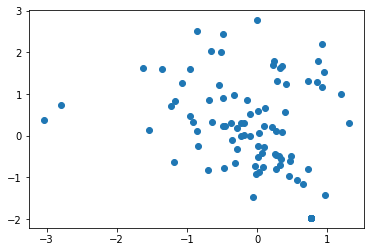

In [41]:
model1 =PCA(2)
pca_drawer = model1.fit_transform(standard_drawer)
pca_drawer=pd.DataFrame(pca_drawer,columns=['pc1','pc2'])
plt.scatter(pca_drawer.pc1,pca_drawer.pc2)
plt.show()

In [62]:
guesser = pd.read_csv("guesser_attributes.csv")

In [63]:
guesser.columns

Index(['g_guesser', 'g_noofmessage_median', 'g_firstmessagetime_median',
       'g_lastmessagetime_median', 'g_rangemessagetime_median',
       'g_pcgamesconfusion', 'g_entropy'],
      dtype='object')

In [43]:
guesser.drop(['g_guesser'],axis=1,inplace=True)

In [44]:
scaler = StandardScaler()
standard_guesser = scaler.fit_transform(guesser)

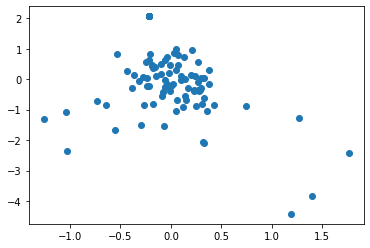

In [45]:
model =PCA(2)
pca_guesser = model.fit_transform(standard_guesser)
pca_guesser=pd.DataFrame(pca_guesser,columns=['pc1','pc2'])
plt.scatter(pca_guesser.pc1,pca_guesser.pc2)
plt.show()

* What does each of the new axes that are obtained from PCA represent ?

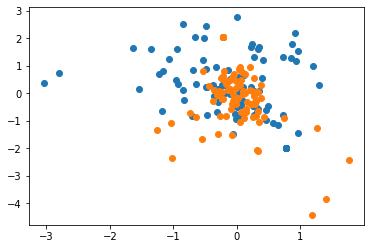

In [46]:
plt.scatter(pca_drawer.pc1,pca_drawer.pc2)
plt.scatter(pca_guesser.pc1,pca_guesser.pc2)
plt.show()

Since, It is not very clear what all these axes are supposedely representing. We must move to SVD based PCA in order to get the loading and components which can then be used to plot the data and understand what they represent

In [65]:
class PCA:
    # Initializing the no_of_components
    def __init__(self,n_components):
        self.n_components = n_components
        self.explained_variance = None
        self.cum_variance = None
        self.U = None
    # Method for fitting and transforming the data
    def fit_transform(self,x):
        # Converting the data to Mean Centered Data
        mean_centered_data = x-np.mean(x,axis=0)
        # Creating the covariance matrix
        cov_matrix = np.cov(mean_centered_data.T)
        # Calculating the SVD components of the matrix
        U,S,V = np.linalg.svd(cov_matrix)
        
        u_reduced = U[:,:self.n_components]
        self.U = u_reduced
        return np.dot(x,u_reduced)

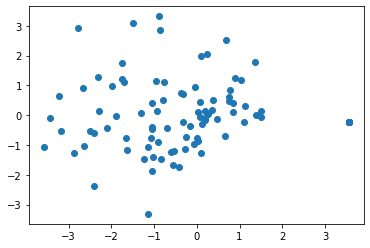

In [66]:
model1 =PCA(2)
pca_drawer = model1.fit_transform(standard_drawer)
pca_drawer=pd.DataFrame(pca_drawer,columns=['pc1','pc2'])
plt.scatter(pca_drawer.pc1,pca_drawer.pc2)
plt.show()

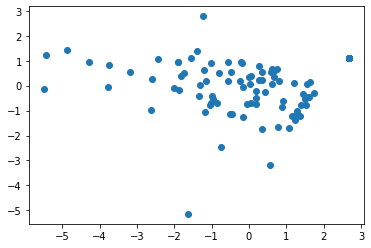

In [70]:
model2 =PCA(2)
pca_guesser = model2.fit_transform(standard_guesser)
pca_guesser=pd.DataFrame(pca_guesser,columns=['pc1','pc2'])
plt.scatter(pca_guesser.pc1,pca_guesser.pc2)
plt.show()

In [72]:
drawer.columns

Index(['d_area_median', 'd_stroke_freq_median', 'd_rangestroketime_median',
       'd_firststroketime_median', 'd_laststroketime_median', 'd_pcgamestup',
       'd_pcgamestdown', 'd_pcgameserasehighlight'],
      dtype='object')

In [73]:
guesser.columns

Index(['g_guesser', 'g_noofmessage_median', 'g_firstmessagetime_median',
       'g_lastmessagetime_median', 'g_rangemessagetime_median',
       'g_pcgamesconfusion', 'g_entropy'],
      dtype='object')

In [68]:
model1.U 

array([[-0.32742125,  0.27913018],
       [-0.18757661,  0.09646145],
       [-0.43916824,  0.23378867],
       [-0.27012568,  0.45826612],
       [-0.44255396,  0.27262253],
       [-0.33287814, -0.53016923],
       [-0.32815517, -0.42677374],
       [-0.4212197 , -0.3325331 ]])

In [71]:
model2.U 

array([[-0.50300333,  0.11902293],
       [-0.17286102, -0.83023862],
       [-0.46517243, -0.34875419],
       [-0.49085471,  0.22145178],
       [-0.12239816,  0.28901973],
       [-0.49477437,  0.20575373]])

* From these values where each feature's weight will be the value at that pricipal component we can define what actually a particular principal component signifies